# Liliana Hotsko 


## VARIANT: 6

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.api import SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.ar_model import AutoReg
from statsmodels.tsa.arima_model import ARMA
from statsmodels.tsa.stattools import adfuller
from sklearn.metrics import mean_squared_error
from statsmodels.tsa.api import Holt


Reading my data

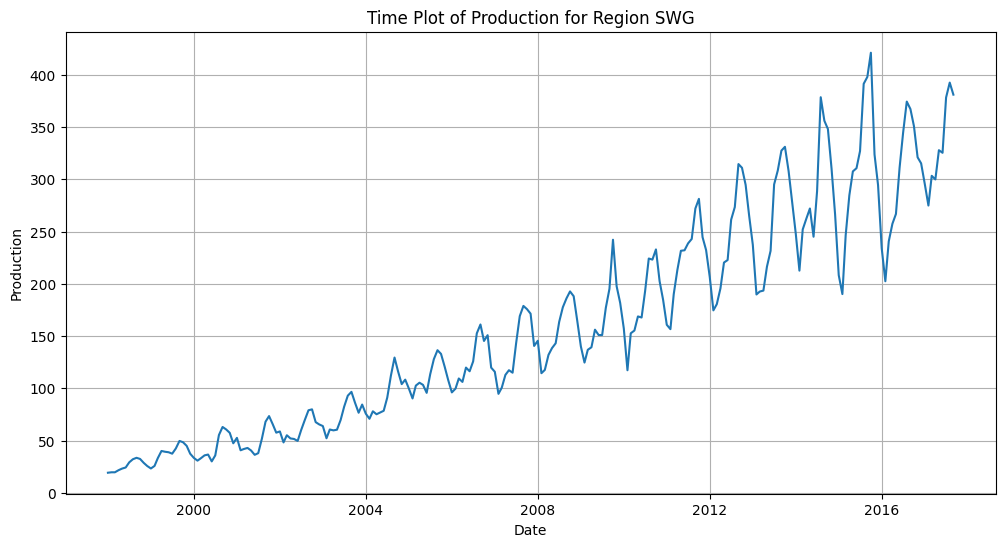

In [2]:
df = pd.read_csv('production_good.csv')
filtered_df = df[df['Region'] == 'SWK'].copy()
filtered_df['Date'] = pd.to_datetime(filtered_df[['Year', 'Month']].assign(day=1))

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Date'], filtered_df['Production'])
plt.title('Time Plot of Production for Region SWG')
plt.xlabel('Date')
plt.ylabel('Production')
plt.grid(True)
plt.show()

In [3]:
print(filtered_df.head())

      index Region  Year  Month  Production  Diff_production       Date
1422      0    SWK  1998      1      19.311           -8.946 1998-01-01
1423      1    SWK  1998      2      19.734         -409.531 1998-02-01
1424      2    SWK  1998      3      19.716            0.423 1998-03-01
1425      3    SWK  1998      4      21.720           -0.018 1998-04-01
1426      4    SWK  1998      5      23.252            2.004 1998-05-01


# TASK №1

### ADDITIVE VS MULTIPLICATIVE

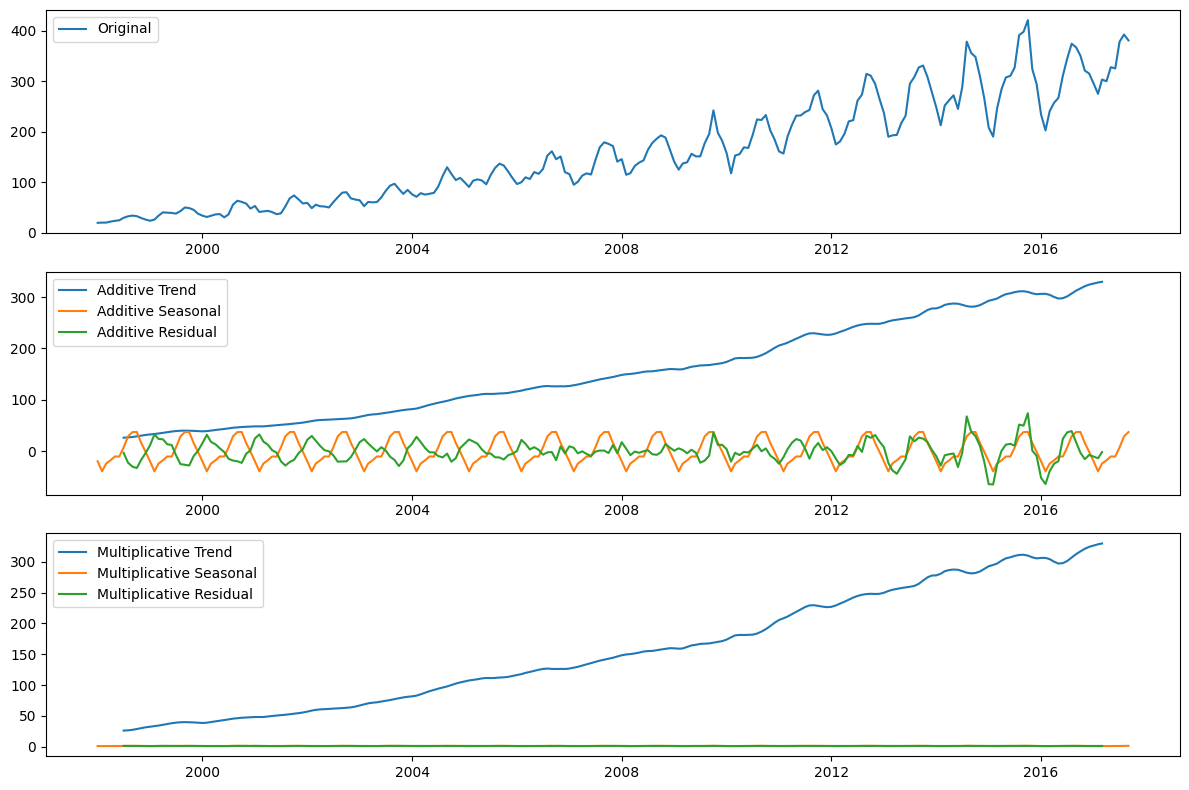

In [4]:
filtered_df.set_index('Date', inplace=True)
production = filtered_df['Production']
result_add = seasonal_decompose(production, model='additive')
result_mult = seasonal_decompose(production, model='multiplicative')

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(filtered_df['Production'], label='Original')
plt.legend()
plt.subplot(312)
plt.plot(result_add.trend, label='Additive Trend')
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.plot(result_add.resid, label='Additive Residual')
plt.legend()
plt.subplot(313)
plt.plot(result_mult.trend, label='Multiplicative Trend')
plt.plot(result_mult.seasonal, label='Multiplicative Seasonal')
plt.plot(result_mult.resid, label='Multiplicative Residual')
plt.legend()
plt.tight_layout()
plt.show()

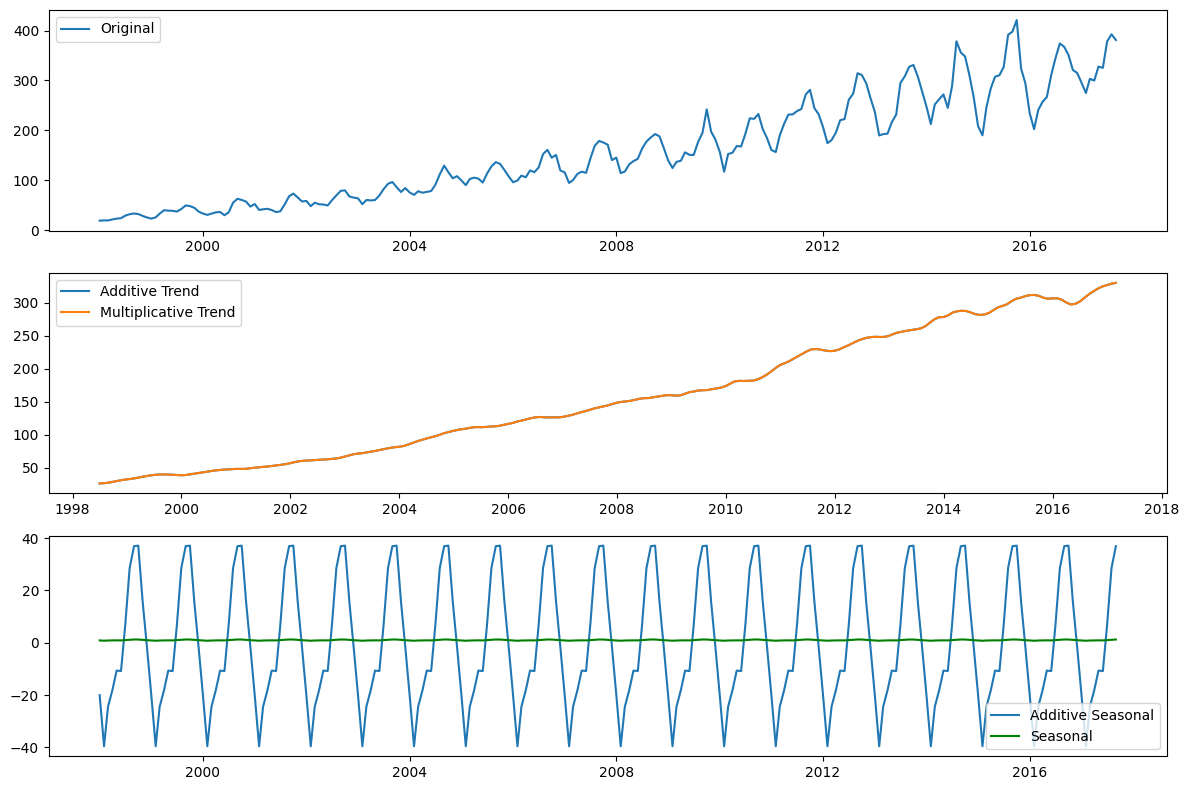

In [5]:
production = filtered_df['Production']
additive_decomposition = seasonal_decompose(production, model='additive')
multiplicative_decomposition = seasonal_decompose(production, model='multiplicative')

plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(filtered_df['Production'], label='Original')
plt.legend()
plt.subplot(312)
plt.plot(result_add.trend, label='Additive Trend')
plt.plot(result_mult.trend, label='Multiplicative Trend')
plt.legend()
plt.subplot(313)
plt.plot(result_add.seasonal, label='Additive Seasonal')
plt.plot(multiplicative_decomposition.seasonal, label='Seasonal', color='g')
plt.legend()
plt.tight_layout()
plt.show()

# Task №2

## Describing the data

### Seasonal Decomposition

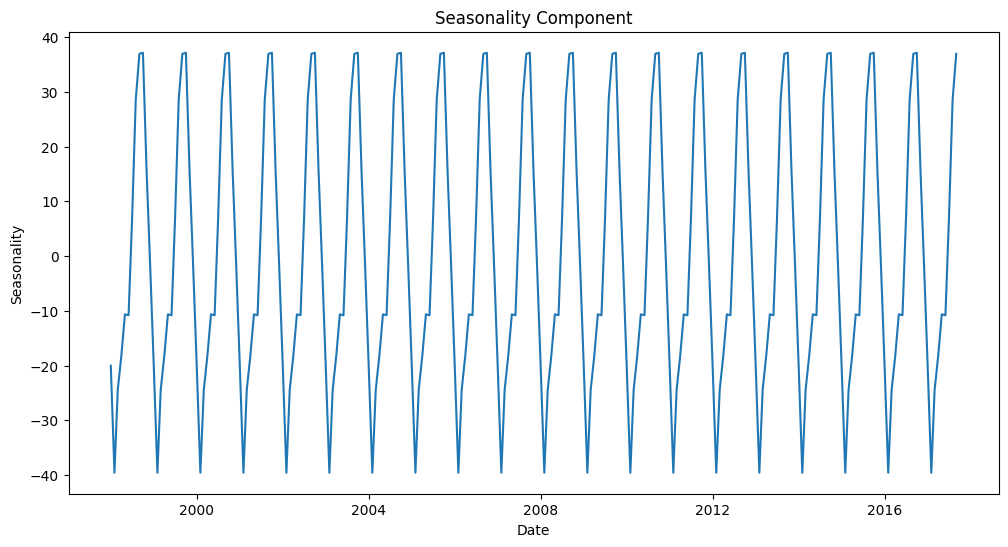

In [6]:

decomposition = seasonal_decompose(filtered_df['Production'], model='additive')
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

plt.figure(figsize=(12, 6))
plt.plot(seasonal)
plt.title('Seasonality Component')
plt.xlabel('Date')
plt.ylabel('Seasonality')
plt.show()

### ACF and PACF Plots

0.9953885446152646
(1.120586278880102, 0.9953885446152646, 12, 224, {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}, 1808.9336604748876)


<Figure size 1200x600 with 0 Axes>

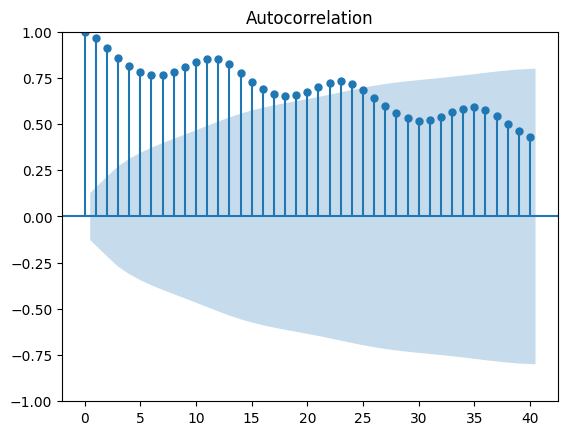

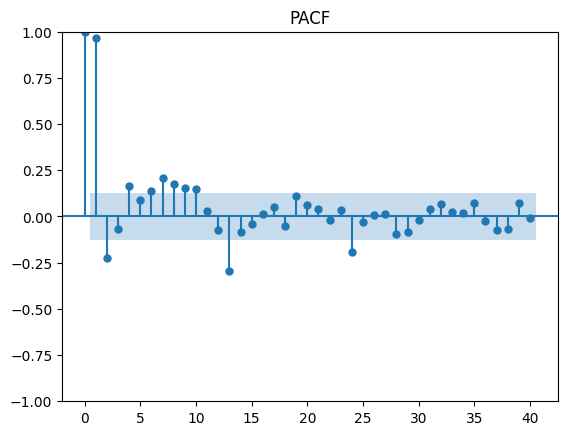

In [7]:
plt.figure(figsize=(12, 6))
plot_acf(filtered_df['Production'], lags=40, alpha=0.05)
adf, pvalue, usedlag, nobs, critical_values, icbest = adfuller(filtered_df['Production'])
print(pvalue)
print(adfuller(filtered_df['Production']))
plot_pacf(filtered_df['Production'], lags=40, title='PACF')
plt.show()

This means that our data is not stationary and needs further changes to use it for forecasting

### Moving Average

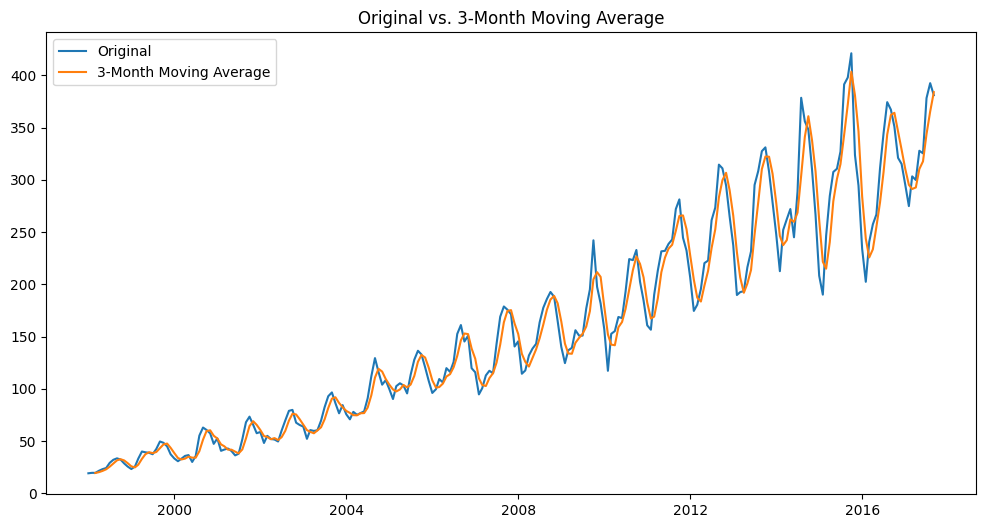

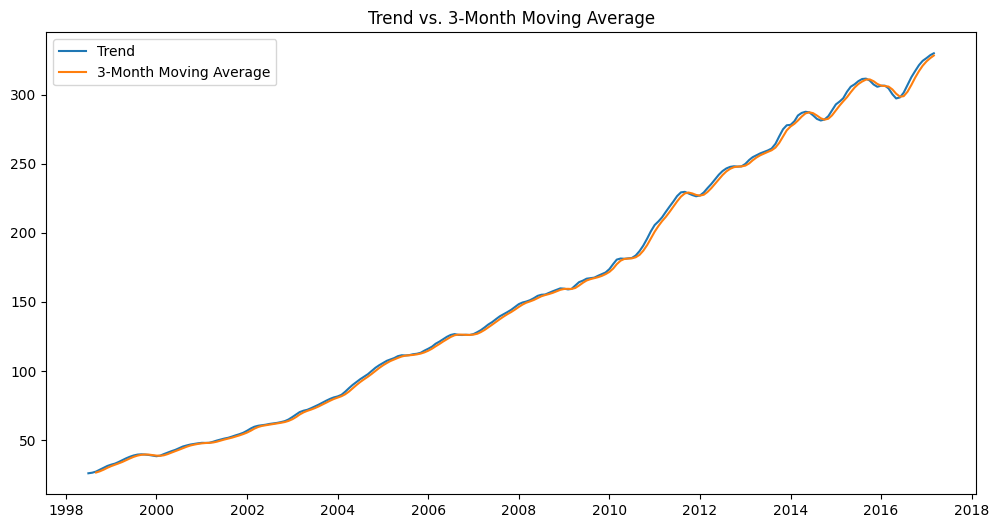

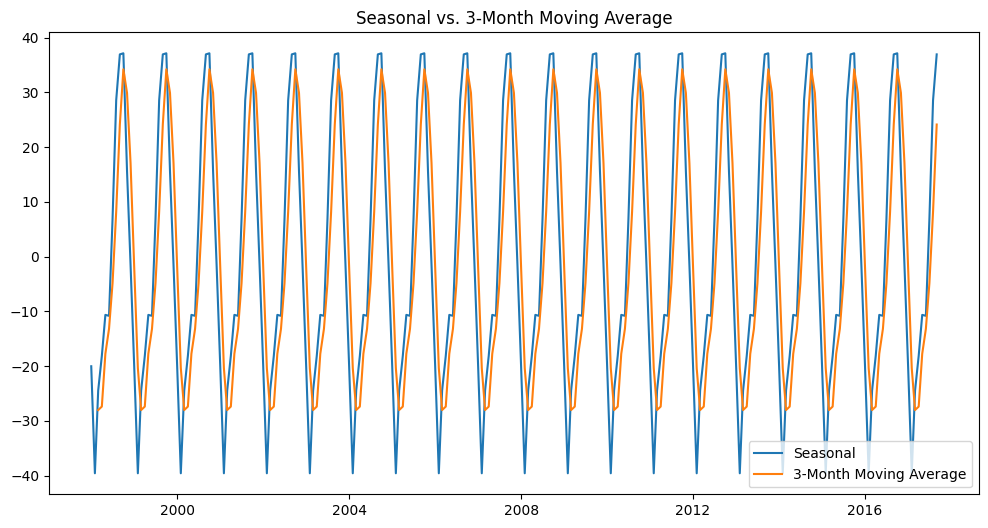

In [8]:
window=3

rolling_mean = filtered_df['Production'].rolling(window=window).mean() 
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Production'], label='Original')
plt.plot(rolling_mean, label=f'{window}-Month Moving Average')
plt.title(f'Original vs. {window}-Month Moving Average')
plt.legend()
plt.show()

rolling_mean = result_add.trend.rolling(window=window).mean() 
plt.figure(figsize=(12, 6))
plt.plot(result_add.trend, label='Trend')
plt.plot(rolling_mean, label=f'{window}-Month Moving Average')
plt.title(f'Trend vs. {window}-Month Moving Average')
plt.legend()
plt.show()

rolling_mean = result_add.seasonal.rolling(window=window).mean() 
plt.figure(figsize=(12, 6))
plt.plot(result_add.seasonal, label='Seasonal')
plt.plot(rolling_mean, label=f'{window}-Month Moving Average')
plt.title(f'Seasonal vs. {window}-Month Moving Average')
plt.legend()
plt.show()

I used 3 moths term as a window because of the seasonality in nature which is important in this topic

simple moving average is a useful tool for identifying patterns in data, but its forecasting capability is limited for longer-term predictions. Exponential smoothing or weighted moving averages, may be more appropriate for better forecast accuracy. 

### Exponential Smoothing

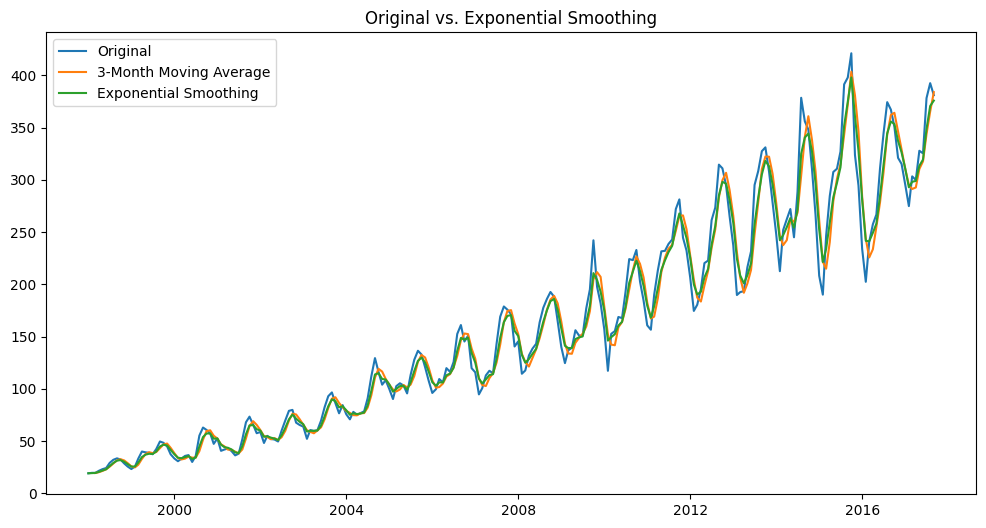

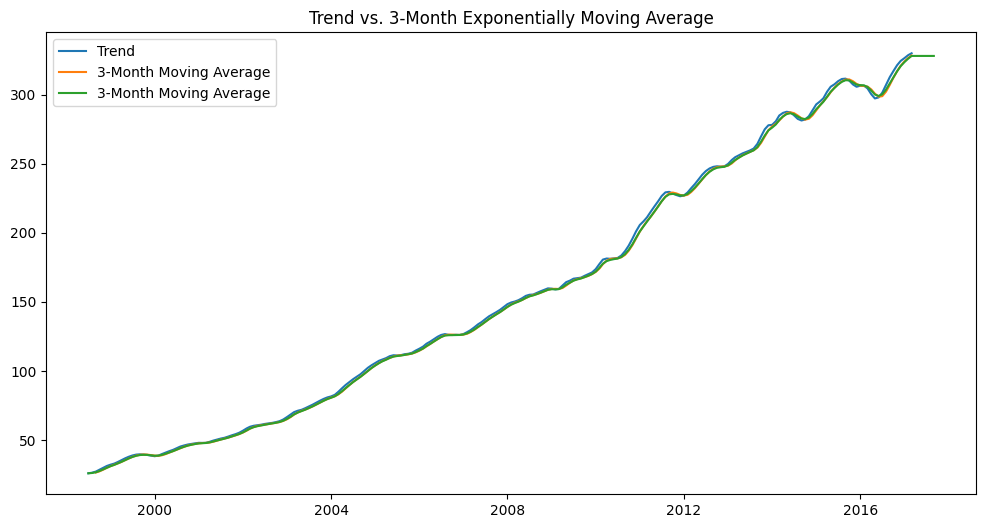

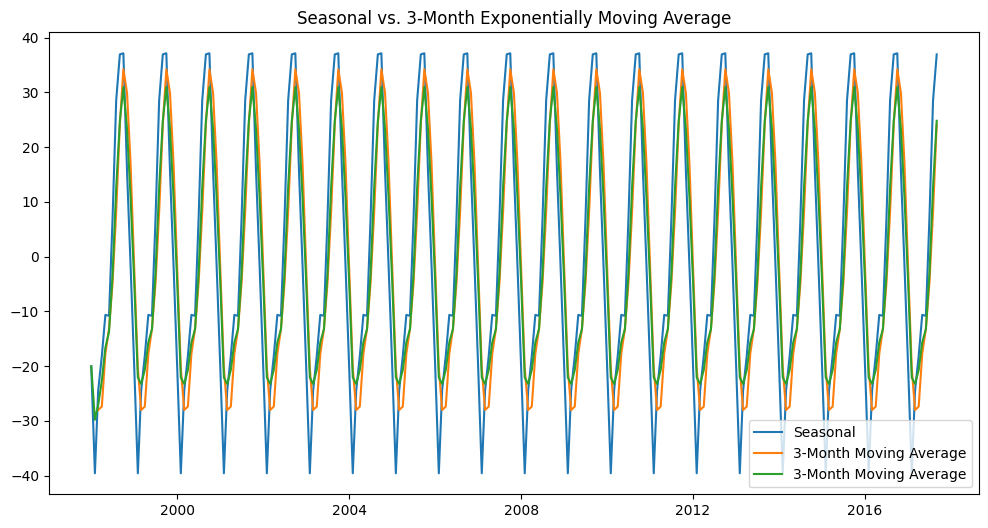

In [9]:
rolling_mean = filtered_df['Production'].rolling(window=window).mean() 
exponential_smoothed = filtered_df['Production'].ewm(span=window, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Production'], label='Original')
plt.plot(rolling_mean, label=f'{window}-Month Moving Average')
plt.plot(exponential_smoothed, label='Exponential Smoothing')
plt.title('Original vs. Exponential Smoothing')
plt.legend()
plt.show()

rolling_mean = result_add.trend.rolling(window=window).mean() 
exponential_smoothed = result_add.trend.ewm(span=window, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(result_add.trend, label='Trend')
plt.plot(rolling_mean, label=f'{window}-Month Moving Average')
plt.plot(exponential_smoothed, label=f'{window}-Month Moving Average')
plt.title(f'Trend vs. {window}-Month Exponentially Moving Average')
plt.legend()
plt.show()

rolling_mean = result_add.seasonal.rolling(window=window).mean() 
exponential_smoothed = result_add.seasonal.ewm(span=window, adjust=False).mean()
plt.figure(figsize=(12, 6))
plt.plot(result_add.seasonal, label='Seasonal')
plt.plot(rolling_mean, label=f'{window}-Month Moving Average')
plt.plot(exponential_smoothed, label=f'{window}-Month Moving Average')
plt.title(f'Seasonal vs. {window}-Month Exponentially Moving Average')
plt.legend()
plt.show()

### Differencing

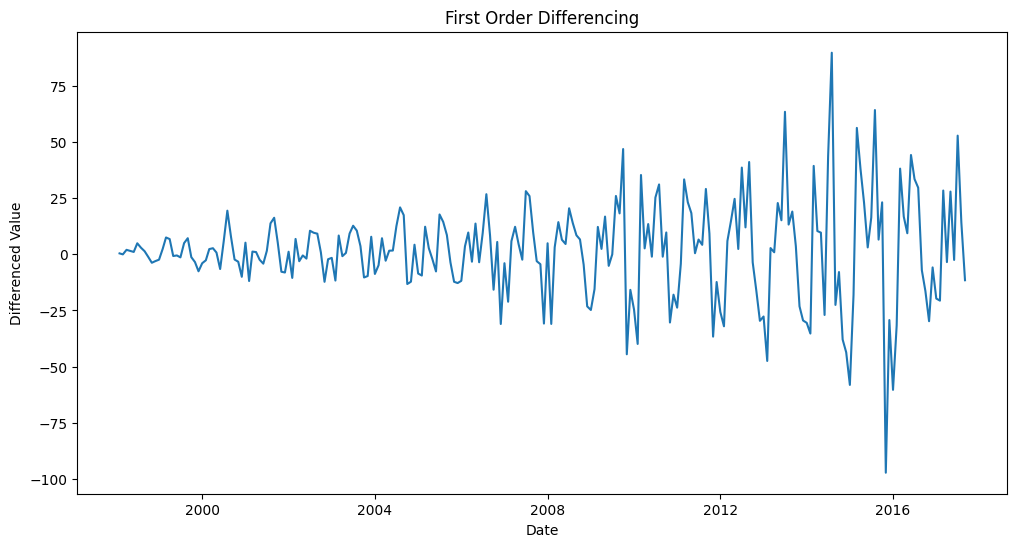

In [10]:
first_order_diff = filtered_df['Production'].diff(1).dropna()
plt.figure(figsize=(12, 6))
plt.plot(first_order_diff)
plt.title('First Order Differencing')
plt.xlabel('Date')
plt.ylabel('Differenced Value')
plt.show()

### Stationarity Check

In [11]:
import pandas as pd
chunk_size = 12
chunk_means = []
chunk_variances = []
for i in range(0, len(filtered_df), chunk_size):
    chunk = filtered_df['Production'].iloc[i:i+chunk_size]
    chunk_means.append(chunk.mean())
    chunk_variances.append(chunk.var())
chunk_statistics = pd.DataFrame({'Chunk Mean': chunk_means, 'Chunk Variance': chunk_variances})
print(chunk_statistics)


    Chunk Mean  Chunk Variance
0    25.839250       28.031481
1    38.463667       64.231754
2    43.353000      157.922594
3    50.856833      163.723292
4    61.488667      120.058524
5    73.872750      215.509299
6    93.045500      398.762096
7   111.386500      224.839300
8   125.260167      485.660961
9   136.271583      956.365631
10  155.364333      748.753044
11  166.065917     1136.810029
12  181.613083     1214.325513
13  224.660333     1506.744371
14  243.348333     2473.849454
15  259.089250     2989.616004
16  286.611000     2606.914848
17  308.560667     5158.417017
18  298.776667     3242.750656
19  330.884333     1835.706115


There are large deviations in the mean and variance between chunks

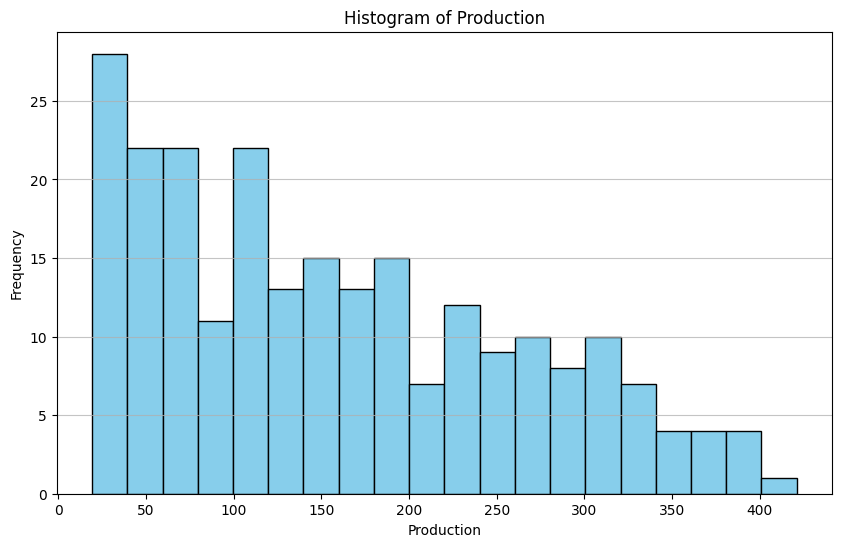

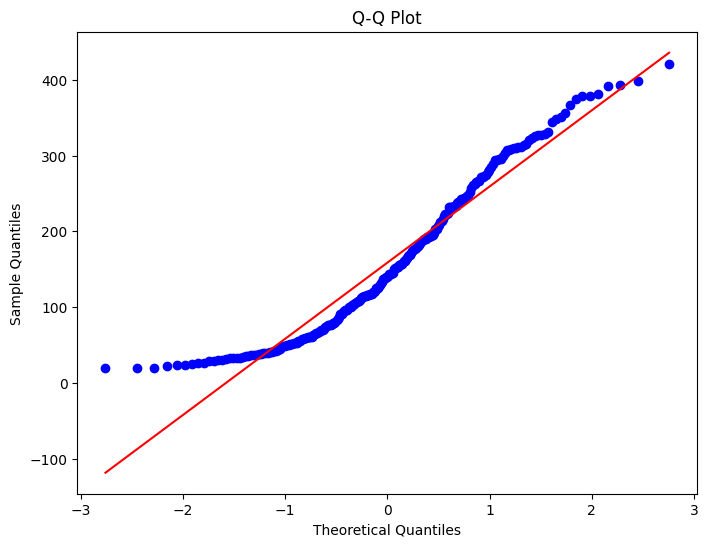

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(filtered_df['Production'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Production')
plt.xlabel('Production')
plt.ylabel('Frequency')
plt.grid(axis='y', alpha=0.75)
plt.show()

import scipy.stats as stats
data = filtered_df['Production']

# Generate a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(data, dist="norm", plot=plt)
plt.title('Q-Q Plot')
plt.xlabel('Theoretical Quantiles')
plt.ylabel('Sample Quantiles')
plt.show()

distribution of the data is not close to NORMAL

In [13]:
result = statsmodels.tsa.stattools.adfuller(filtered_df['Production'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:', result[4])

if result[1] <= 0.05:
    print('The time series is stationary.')
else:
    print('The time series is not stationary.')


ADF Statistic: 1.120586278880102
p-value: 0.9953885446152646
Critical Values: {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}
The time series is not stationary.


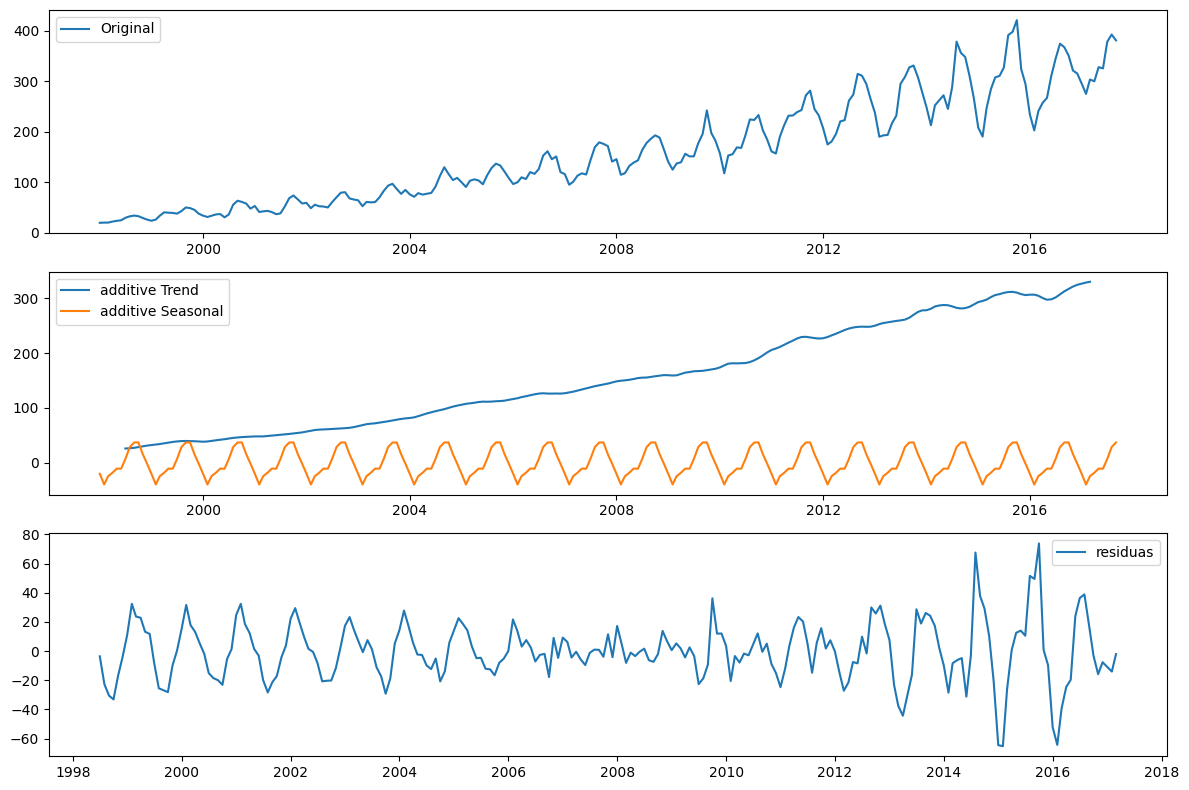

In [14]:
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(filtered_df['Production'], label='Original')
plt.legend()
plt.subplot(313)
plt.plot(result_add.resid, label='residuas')
plt.legend()
plt.subplot(312)
plt.plot(result_add.trend, label='additive Trend')
plt.plot(result_add.seasonal, label='additive Seasonal')

plt.legend()
plt.tight_layout()
plt.show()

# Task №3

## Decomposition & Differencing

### Decomposition

In [15]:
result_decomposition = adfuller(residual.dropna())
print('ADF Statistic (Decomposition):', result_decomposition[0])
print('p-value (Decomposition):', result_decomposition[1])
print('Critical Values (Decomposition):', result_decomposition[4])


if result_decomposition[1] <= 0.05:
    print('The time series is stationary (Decomposition approach).\n')
else:
    print('The time series is not stationary (Decomposition approach).\n')

ADF Statistic (Decomposition): -7.304661589156754
p-value (Decomposition): 1.3110543045747072e-10
Critical Values (Decomposition): {'1%': -3.4620315036789666, '5%': -2.8754705024827127, '10%': -2.5741950726860647}
The time series is stationary (Decomposition approach).



### DIfferencing

In [16]:
first_order_diff = filtered_df['Production'].diff(1).dropna()
result_diff = adfuller(first_order_diff)
print('ADF Statistic (Differencing):', result_diff[0])
print('p-value (Differencing):', result_diff[1])
print('Critical Values (Differencing):', result_diff[4])

if result_diff[1] <= 0.05:
    print('The time series is stationary (Differencing approach).')
else:
    print('The time series is not stationary (Differencing approach).')

ADF Statistic (Differencing): -7.511238478798272
p-value (Differencing): 4.01041081692377e-11
Critical Values (Differencing): {'1%': -3.459884913337196, '5%': -2.8745310704320794, '10%': -2.573693840082908}
The time series is stationary (Differencing approach).


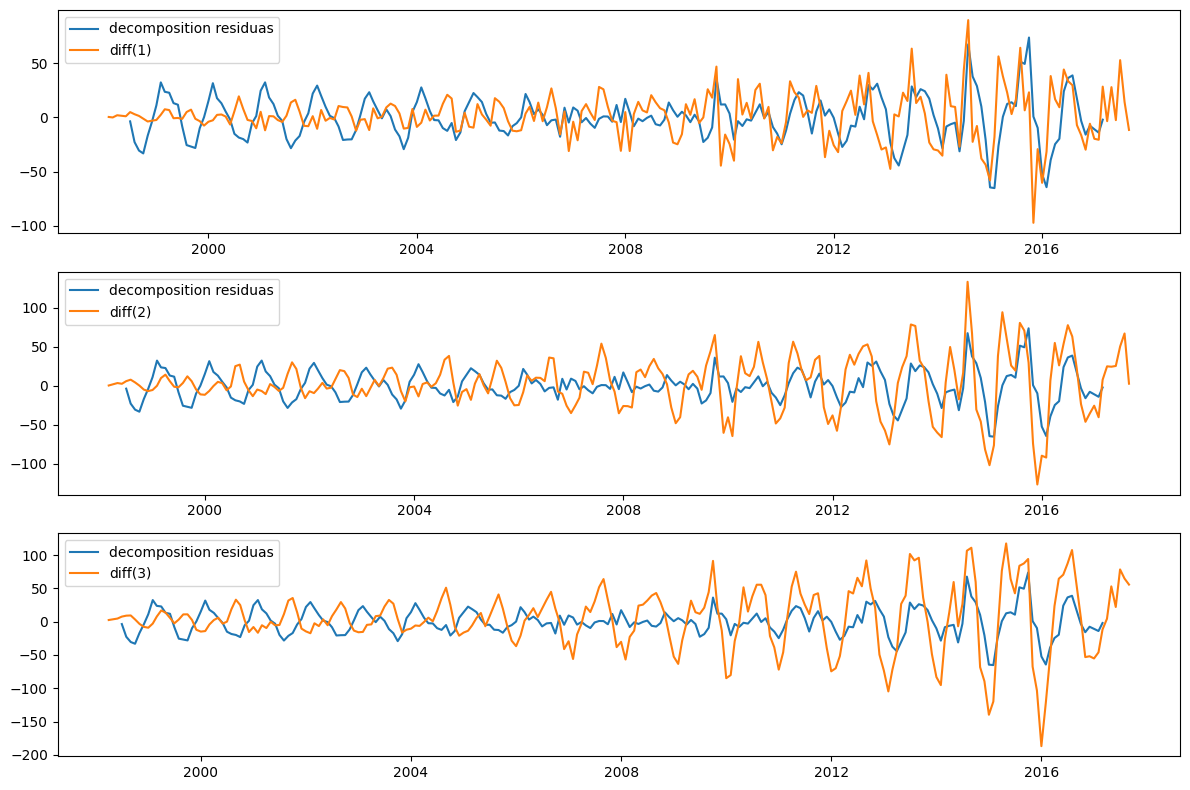

In [17]:
plt.figure(figsize=(12, 8))
plt.subplot(311)
plt.plot(residual.dropna(), label='decomposition residuas')
plt.plot(filtered_df['Production'].diff(1).dropna(), label='diff(1)')
plt.legend()

plt.subplot(312)
plt.plot(residual.dropna(), label='decomposition residuas')
plt.plot(filtered_df['Production'].diff(2).dropna(), label='diff(2)')

plt.legend()

plt.subplot(313)
plt.plot(residual.dropna(), label='decomposition residuas')
plt.plot(filtered_df['Production'].diff(3).dropna(), label='diff(3)')


plt.legend()
plt.tight_layout()
plt.show()

### Task №4

## Training and validating models: Moving Average, Exponential Smoothing


In [18]:
def process_data(production, rainfall, area, REGIONS, PRODUCTION_LAGS, RAINFALL_LAGS):
    output = {}
    for i, region in enumerate(REGIONS):
        data = production[production.Region == region[0]]
        data = pd.merge(data[['Year', 'Month', 'Production', 'Diff_production']],
                        rainfall[rainfall.Region == region[1]][['Year', 'Month', 'Rainfall']], 
                        on=['Year', 'Month'], how='left')

        data = pd.merge(data, area[area.Region == region[2]][
            ['Year', 'Area_ma', 'Area_npa', 'Area_rpa', 'Area_New', 'Area_ma_new']], on='Year', how='left')
            
        data['Year'] = data['Year'].astype(int)
        data['Month'] = data['Month'].astype(int)
        data.reset_index(inplace=True)

        data.set_index([pd.to_datetime(['{0}-{1}-01'.format(x, y) for (x, y) in zip(data.Year, data.Month)])],
                       inplace=True)

        data.drop(['index', 'Year', 'Area_New', 'Diff_production'], axis=1, inplace=True)
        data['Time'] = np.arange(len(data))

        for lag in RAINFALL_LAGS:
            temp = np.concatenate((np.array([np.nan for _ in range(lag)]), data.Rainfall.values[:-lag]))
            data['Rainfall_{0}'.format(lag)] = temp

        for lag in PRODUCTION_LAGS:
            temp = np.concatenate((np.array([np.nan for _ in range(lag)]), data.Production.values[:-lag]))
            data['Production_{0}'.format(lag)] = temp
        
        PRODUCTION = data.Production
        data.drop(['Production'], axis=1, inplace=True)

        data.fillna(data.mean(), inplace=True)

        #  And finally drop rainfalls
        data.drop(['Rainfall'], axis=1, inplace=True)
        ### HERE I CAN ADD FEATURE ENGINEERING!!!

        #  And clip first year
        for col in data.columns:
            data['_'.join([region[1], str(col)])] = data[col]
            data.drop([col], axis=1, inplace=True)
        
        output[region[1]] = (data[max(PRODUCTION_LAGS):], PRODUCTION[max(PRODUCTION_LAGS):])
    return output

In [19]:
plt.rcParams['figure.dpi']= 100
plt.rcParams['figure.figsize'] = 15, 5

REGIONS = [['JH', 'Johor', 'JH'], 
           ['PH', 'Pahang', 'PH'],
           ['PRK', 'Perak', 'PRK'], 
           ['OtherPEN', 'Other Pen. States', 'OtherPEN'],
           ['PEN', 'Peninsula', 'Pmalay'],
           ['SBH', 'Sabah', 'SBH'],
           ['SWK', 'Sarawak', 'SWK']]

RAINFALL_LAGS = [6, 7, 8, 9, 10, 11, 12]
PRODUCTION_LAGS = [6, 7, 8, 9, 10, 11, 12]
production = pd.read_csv('production_good.csv')
rainfall = pd.read_csv('rainfall_good.csv')
area = pd.read_csv('area_good.csv')
new_data =  process_data(production, rainfall, area, REGIONS, PRODUCTION_LAGS, RAINFALL_LAGS)

plt.figure(figsize=(12, 6))
plt.plot(filtered_df['Production'], label='Original')
plt.plot(new_data['Sarawak'][1], label='new')
plt.legend()
plt.show()

NameError: name 'np' is not defined

### MA

<Axes: >

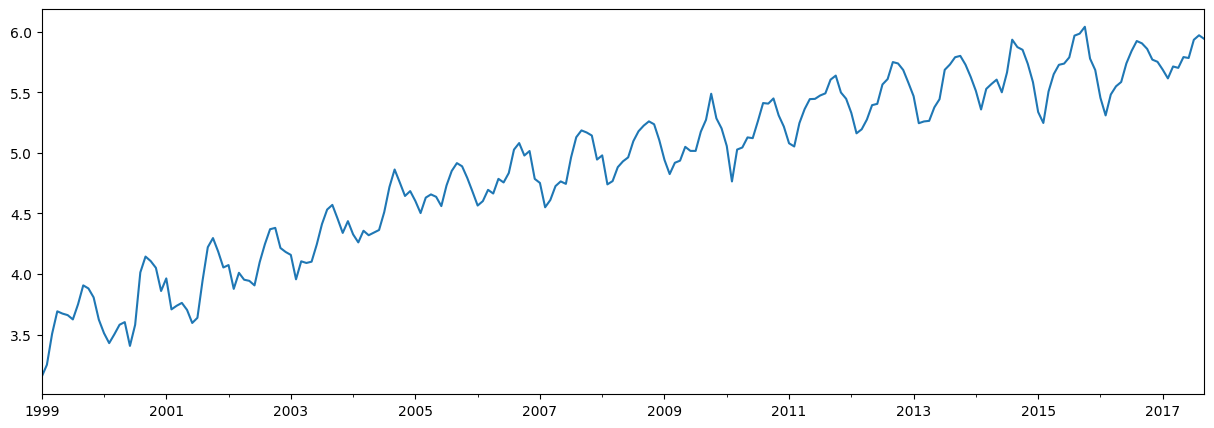

In [ ]:
import numpy as np
new_data_log = np.log(new_data['Sarawak'][1])
new_data_log.plot()

comparing the original time series data with two different types of moving averages: a centered 24-month moving average and a right-aligned 6-month moving average. This allows for visualizing the smoothing effect and trend patterns created by different moving average windows
->>>

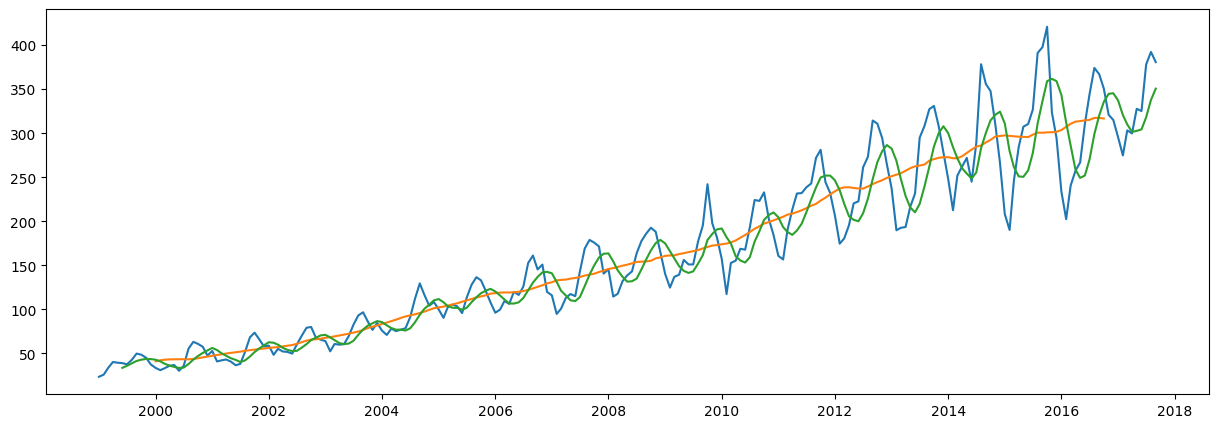

In [ ]:
new_data = new_data['Sarawak'][1]

ts_moving_avg_center = new_data.rolling(24, center=True).mean()
ts_moving_avg_right = new_data.rolling(6, center=False).mean()
plt.plot(new_data)
plt.plot(ts_moving_avg_center, label='Centered 24-Month Moving Average')
plt.plot(ts_moving_avg_right, label='Right 6-Month Moving Average')

### creating subsets for training the models

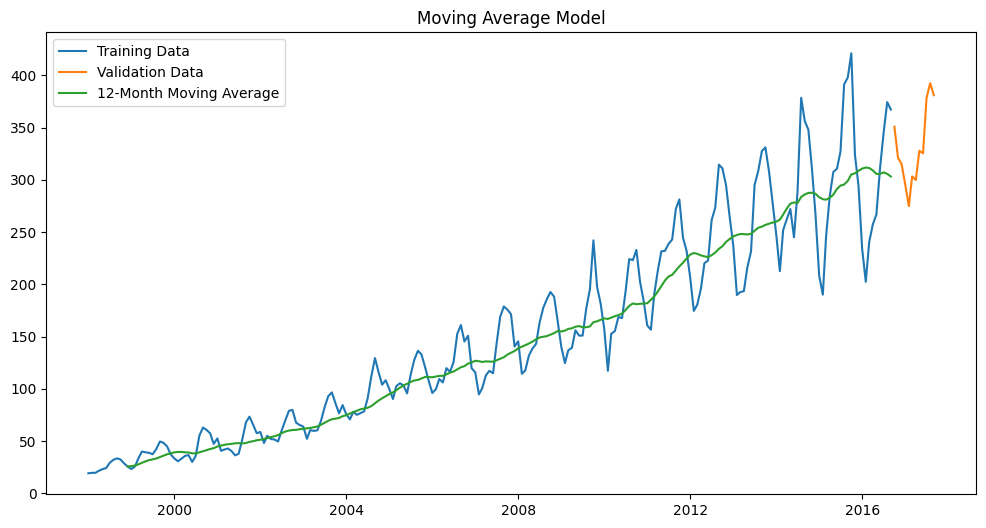

Mean Squared Error (Moving Average): 1965.6046656273154


In [ ]:
train_data = filtered_df['Production'][:-12] 
validation_data = filtered_df['Production'][-12:] 
window = 12 
ma_model = train_data.rolling(window=window).mean()
ma_model = ma_model.dropna()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(ma_model, label=f'{window}-Month Moving Average')
plt.legend()
plt.title('Moving Average Model')
plt.show()

mse_ma = mean_squared_error(validation_data, ma_model[-12:])
print('Mean Squared Error (Moving Average):', mse_ma)


3.8293568181818194


<Axes: >

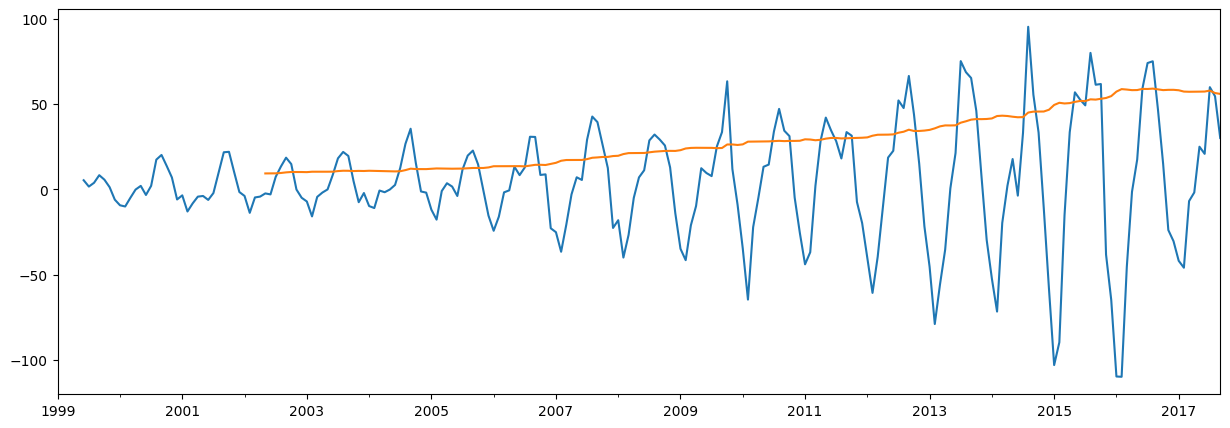

In [ ]:
ts_ma_diff = new_data - ts_moving_avg_right
print(np.nanmean(ts_ma_diff))
ts_ma_diff.plot()
ts_ma_diff.rolling(36).std().plot()


Results of Dickey-Fuller Test:
(1.0625537814707051, 0.9948840159138252, 12, 212, {'1%': -3.4615775784078466, '5%': -2.875271898983725, '10%': -2.5740891037735847}, 1722.9651945586925)
Test Statistic                   1.062554
p-value                          0.994884
#Lags Used                      12.000000
Number of Observations Used    212.000000
Critical Value (1%)             -3.461578
Critical Value (5%)             -2.875272
Critical Value (10%)            -2.574089
dtype: float64


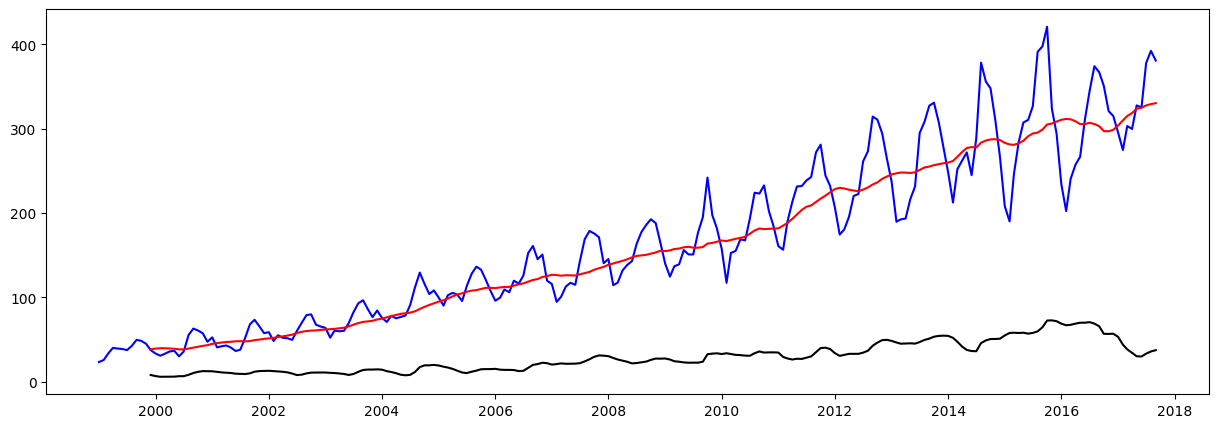

In [ ]:

rolmean = new_data.rolling(12).mean()
rolstd = new_data.rolling(12).std()

orig = plt.plot(new_data, color='blue',label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label = 'Rolling Std')

print("Results of Dickey-Fuller Test:")
dftest = adfuller(new_data, regression='c', autolag='AIC')
print(dftest)     
dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
print(dfoutput)   

### Exponential Smoothing

In [ ]:
first_order_diff = new_data.diff(1).dropna()
result_diff = adfuller(first_order_diff)
print('ADF Statistic (Differencing):', result_diff[0])
print('p-value (Differencing):', result_diff[1])
print('Critical Values (Differencing):', result_diff[4])

if result_diff[1] <= 0.05:
    print('The time series is stationary (Differencing approach).')
    stationary = first_order_diff
else:
    print('The time series is not stationary (Differencing approach).')

ADF Statistic (Differencing): -7.284619545794563
p-value (Differencing): 1.469875046490261e-10
Critical Values (Differencing): {'1%': -3.4615775784078466, '5%': -2.875271898983725, '10%': -2.5740891037735847}
The time series is stationary (Differencing approach).


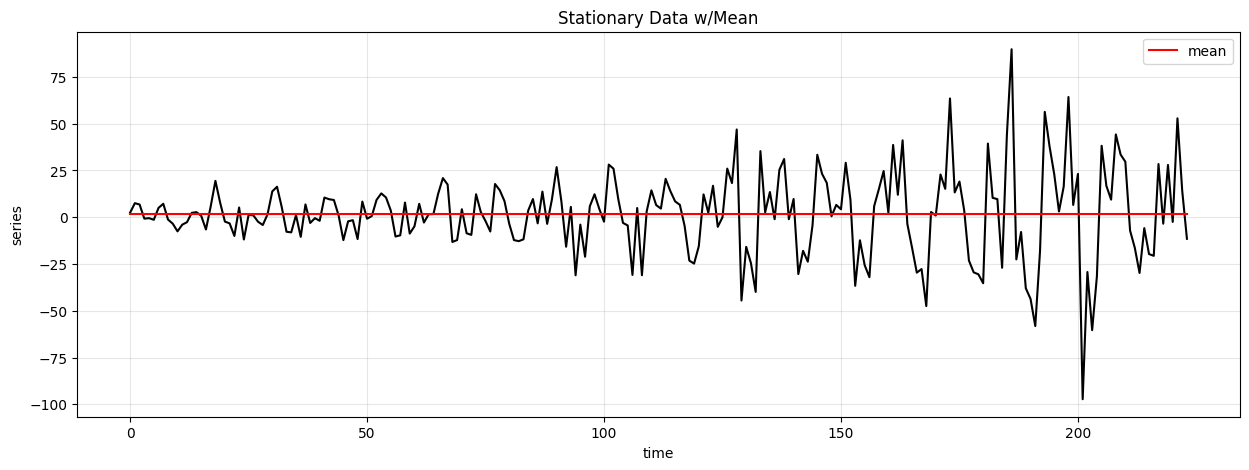

In [ ]:
stationary_time_series_avg = np.mean(stationary)
sts_avg = np.full(shape=len(np.arange(224)), fill_value=stationary_time_series_avg, dtype='float')

def run_sequence_plot(x, y, title, xlabel="time", ylabel="series"):
    plt.plot(x, y, 'k-')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(alpha=0.3)

run_sequence_plot(np.arange(224), stationary,
                  title="Stationary Data w/Mean")
plt.plot(np.arange(224), sts_avg, 'r', label="mean")
plt.legend()

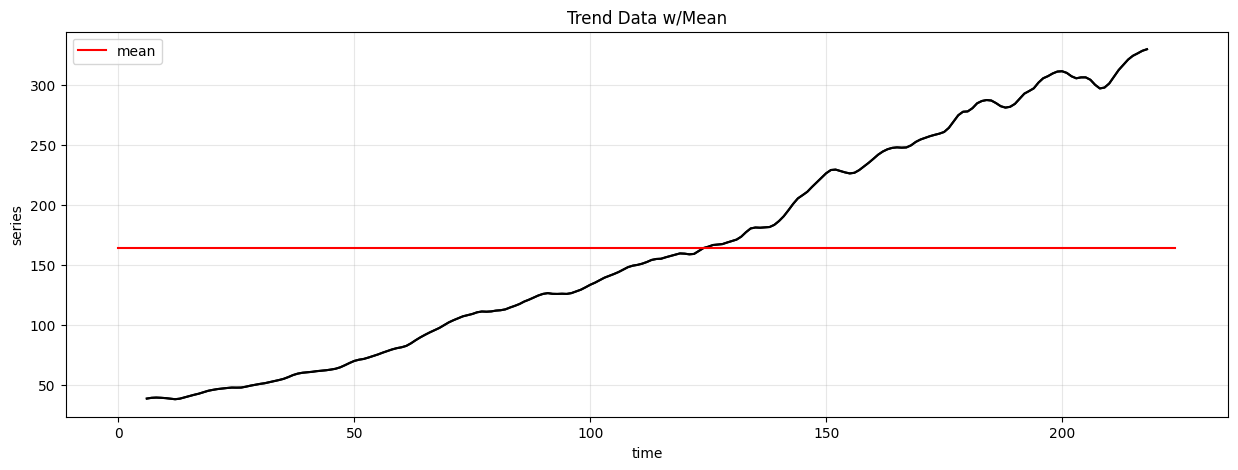

In [ ]:
decomposition = seasonal_decompose(new_data, model='additive')
seasonal = decomposition.seasonal
trend = decomposition.trend
residual = decomposition.resid

run_sequence_plot(np.arange(225), trend,
                  title="Nonstationary Data w/Trend")
trend_time_series_avg = np.mean(trend)
trend_avg = np.full(shape=225, fill_value=trend_time_series_avg, dtype='float')

run_sequence_plot(np.arange(225), trend,
                  title="Trend Data w/Mean")
plt.plot(np.arange(225), trend_avg, 'r', label="mean")
plt.legend()


plot shows that this way is not appropriate for forecasting, so it's better to look for another options

In [ ]:
def ewma(observations, forecast=True):
    weights = np.array([0.160, 0.294, 0.543])
    output = np.zeros_like(observations, dtype='float')
    for i, _ in enumerate(observations):
        if (i == 0) or (i == 1) or (i == len(observations) - 1):
            pass
        else:
            output[i] = np.dot(observations[i-2:i+1], weights)
    if forecast:
        return np.insert(output, 0, 0)
    else:
        return output

t = np.arange(len(new_data))
ewma_smoothed_vals = ewma(new_data, forecast=True)

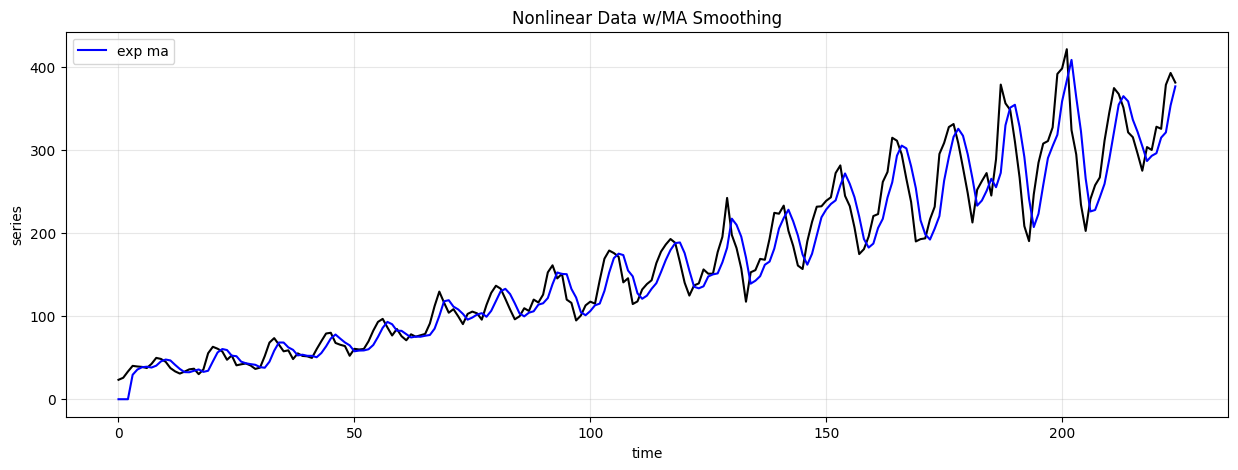

In [ ]:
run_sequence_plot(t, new_data,
                  title="Nonlinear Data w/MA Smoothing")
plt.plot(t, ewma_smoothed_vals[:-1], 'b', label="exp ma")
plt.legend(loc='upper left')

# Exponential Smoothing

Single Exponential Smoothing

Predictions:  2016-12-01    321.13833
2017-01-01    321.13833
2017-02-01    321.13833
2017-03-01    321.13833
2017-04-01    321.13833
2017-05-01    321.13833
2017-06-01    321.13833
2017-07-01    321.13833
2017-08-01    321.13833
2017-09-01    321.13833
Freq: MS, dtype: float64


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


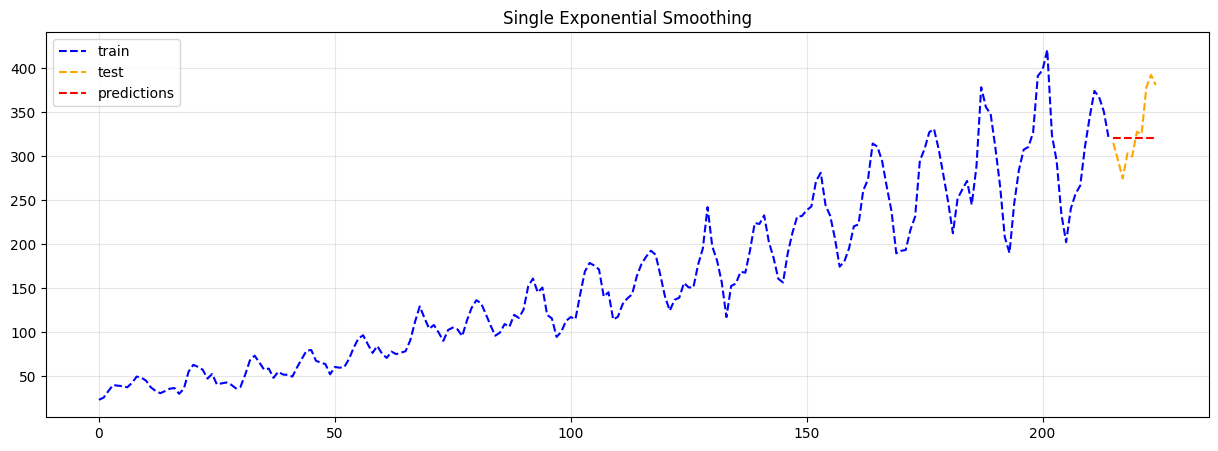

In [ ]:
n = 10

train = new_data[:-n]
test = new_data[-n:]
time = np.arange(225)
single = SimpleExpSmoothing(train).fit(optimized=True)
single_preds = single.forecast(len(test))
print("Predictions: ", single_preds)
plt.plot(time[:-n], train, 'b--', label="train")
plt.plot(time[-n:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-n:], single_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Single Exponential Smoothing")
plt.grid(alpha=0.3)

## Double Exponential Smoothing

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions:  2016-12-01    323.571038
2017-01-01    325.991566
2017-02-01    328.412093
2017-03-01    330.832621
2017-04-01    333.253149
2017-05-01    335.673677
2017-06-01    338.094205
2017-07-01    340.514733
2017-08-01    342.935260
2017-09-01    345.355788
Freq: MS, dtype: float64


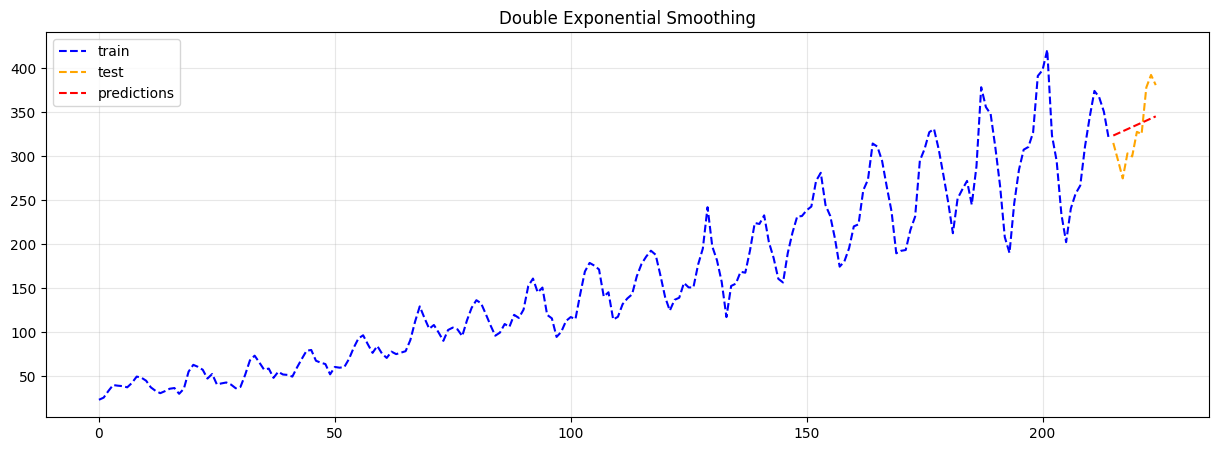

In [ ]:
n = 10

train = new_data[:-n]
test = new_data[-n:]
time = np.arange(225)
double = Holt(train).fit(optimized=True)
double_preds = double.forecast(len(test))
print("Predictions: ", double_preds)
plt.plot(time[:-n], train, 'b--', label="train")
plt.plot(time[-n:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-n:], double_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Double Exponential Smoothing")
plt.grid(alpha=0.3)

## Tripple Exponential Smoothing

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Predictions:  2016-12-01    289.733447
2017-01-01    249.479213
2017-02-01    234.992928
2017-03-01    282.505357
2017-04-01    303.944848
2017-05-01    318.655915
2017-06-01    335.863383
2017-07-01    358.730631
2017-08-01    398.025885
2017-09-01    390.743206
Freq: MS, dtype: float64


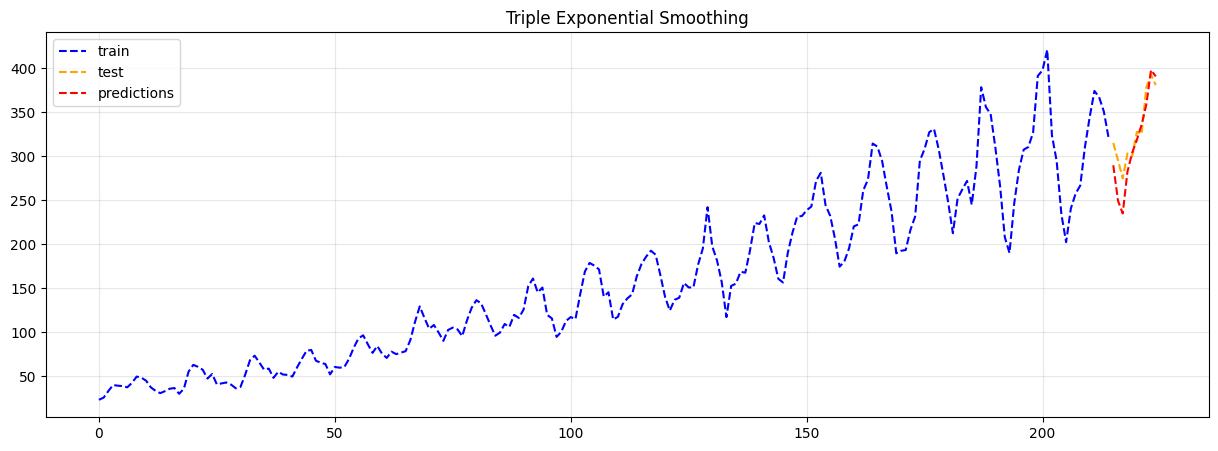

In [ ]:
from statsmodels.tsa.api import ExponentialSmoothing

triple = ExponentialSmoothing(train,
                              trend="additive",
                              seasonal="additive",
                              seasonal_periods=12).fit(optimized=True)
triple_preds = triple.forecast(len(test))
print("Predictions: ", triple_preds)

plt.plot(time[:-n], train, 'b--', label="train")
plt.plot(time[-n:], test, color='orange', linestyle="--", label="test")
plt.plot(time[-n:], triple_preds, 'r--', label="predictions")
plt.legend(loc='upper left')
plt.title("Triple Exponential Smoothing")
plt.grid(alpha=0.3)

from the plots above it's obvious that exponentiality gives us higher accuracy in forecasting

plotting all types of data for better understanding

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


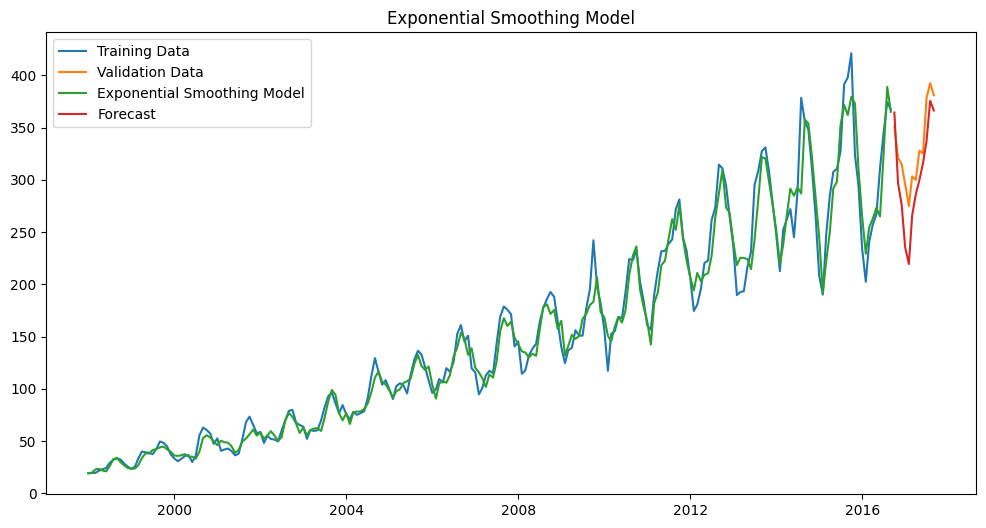

Mean Squared Error (Exponential Smoothing): 1135.1601786127599


In [ ]:
exp_smoothing_model = ExponentialSmoothing(train_data, seasonal='add', seasonal_periods=12).fit()
exp_smoothing_forecast = exp_smoothing_model.forecast(12)

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(exp_smoothing_model.fittedvalues, label='Exponential Smoothing Model')
plt.plot(exp_smoothing_forecast, label='Forecast')
plt.legend()
plt.title('Exponential Smoothing Model')
plt.show()

mse_exp_smoothing = mean_squared_error(validation_data, exp_smoothing_forecast)
print('Mean Squared Error (Exponential Smoothing):', mse_exp_smoothing)


# Task №5

## Training and validating MA, AR, ARMA, ARIMA models

### MA

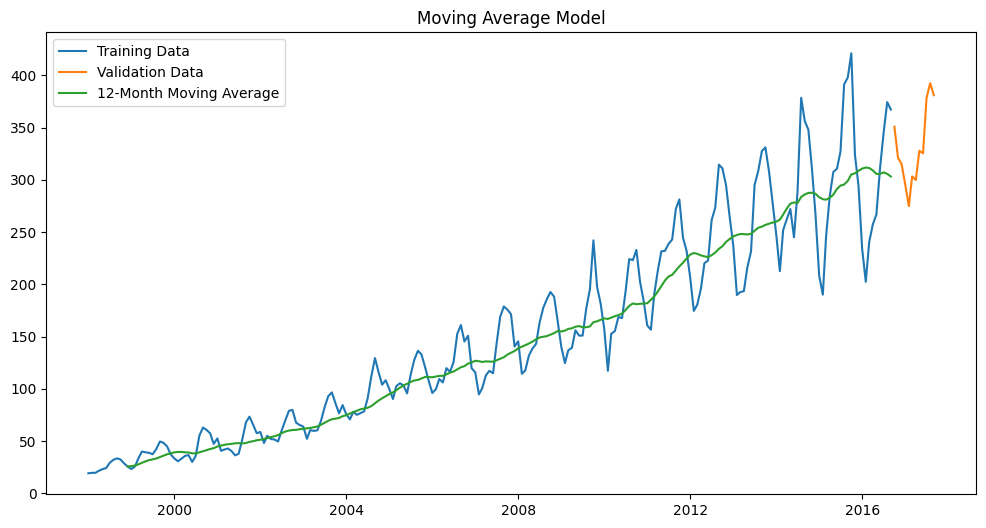

Mean Squared Error (Moving Average): 1965.6046656273154


In [ ]:
window = 12  
ma_model = train_data.rolling(window=window).mean()
ma_model = ma_model.dropna()

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(ma_model, label=f'{window}-Month Moving Average')
plt.legend()
plt.title('Moving Average Model')
plt.show()

mse_ma = mean_squared_error(validation_data, ma_model[-12:])
print('Mean Squared Error (Moving Average):', mse_ma)

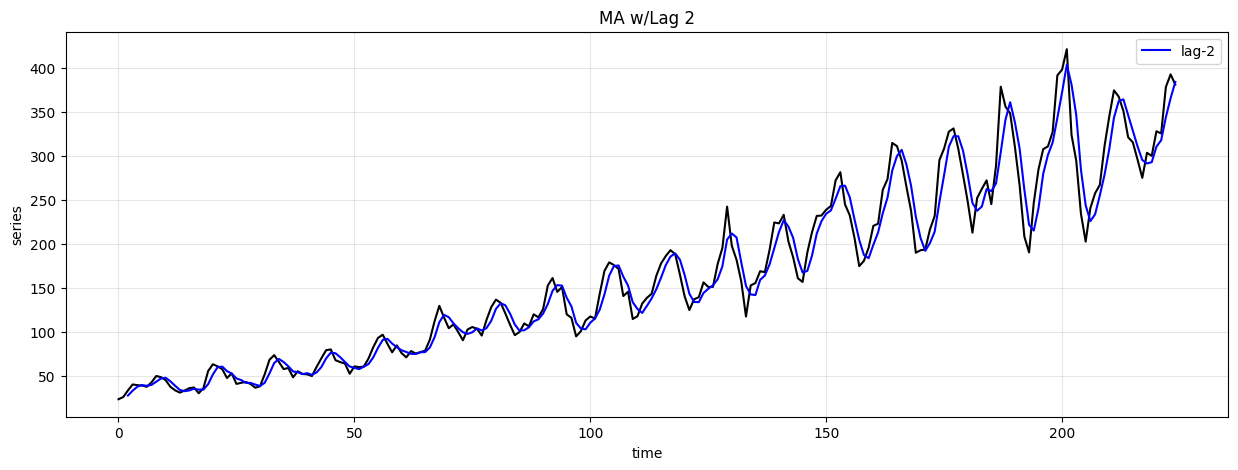

In [ ]:
series = pd.Series(new_data)
time= np.arange(len(series))
lag_2 = series.rolling(window=3).mean()
lag_3 = series.rolling(window=5).mean()
lag_5 = series.rolling(window=9).mean()
lag_10= series.rolling(window=19).mean()
run_sequence_plot(time, new_data, title="MA w/Lag 2")
plt.plot(time, lag_2, 'b-', label="lag-2")
plt.legend()



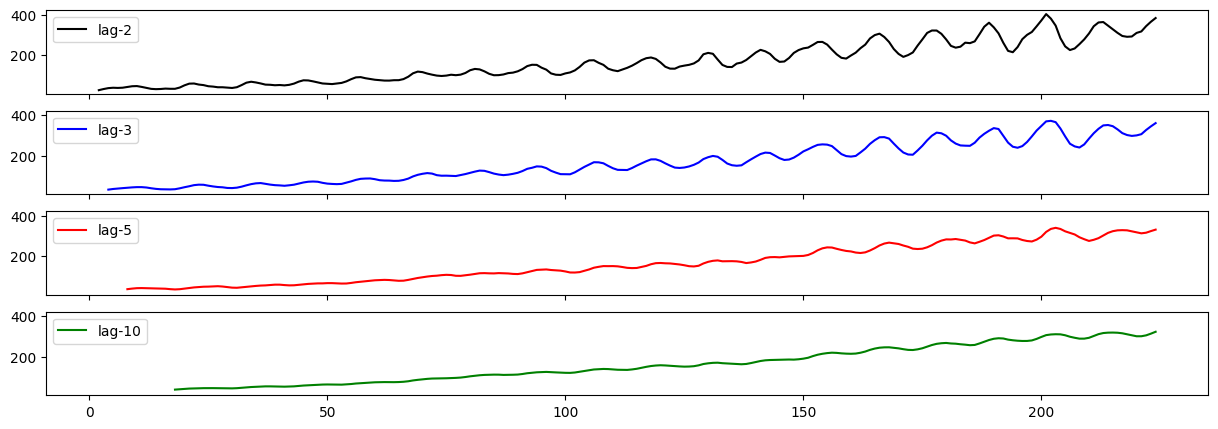

In [ ]:
fig, axes = plt.subplots(4, 1, sharex=True, sharey=True)
axes[0].plot(time, lag_2, 'k-', label="lag-2")
axes[0].legend()
axes[1].plot(time, lag_3, 'b-', label="lag-3")
axes[1].legend()
axes[2].plot(time, lag_5, 'r-', label="lag-5")
axes[2].legend()
axes[3].plot(time, lag_10, 'g-', label="lag-10")
axes[3].legend()

In [ ]:
train_data = filtered_df['Production'][:-24]
validation_data = filtered_df['Production'][-24:-12]

### AR

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


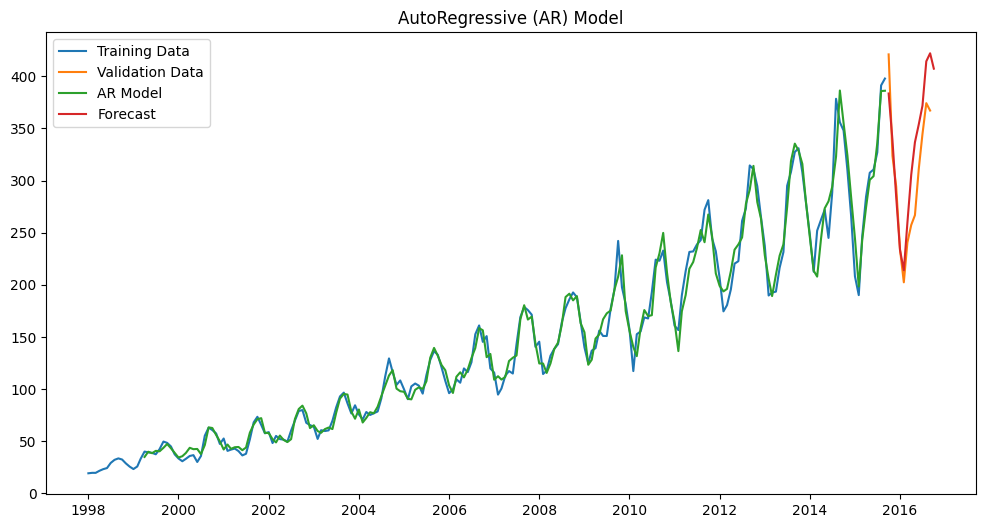

In [ ]:
lags = 15
ar_model = AutoReg(train_data, lags=lags).fit()
ar_forecast = ar_model.predict(start=len(train_data), end=len(train_data) + 12, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(ar_model.fittedvalues, label='AR Model')
plt.plot(ar_forecast, label='Forecast')
plt.legend()
plt.title('AutoRegressive (AR) Model')
plt.show()


/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/deterministic.py:302: UserWarning: Only PeriodIndexes, DatetimeIndexes with a frequency set, RangesIndexes, and Index with a unit increment support extending. The index is set will contain the position relative to the data length.
  fcast_index = self._extend_index(index, steps, forecast_index)


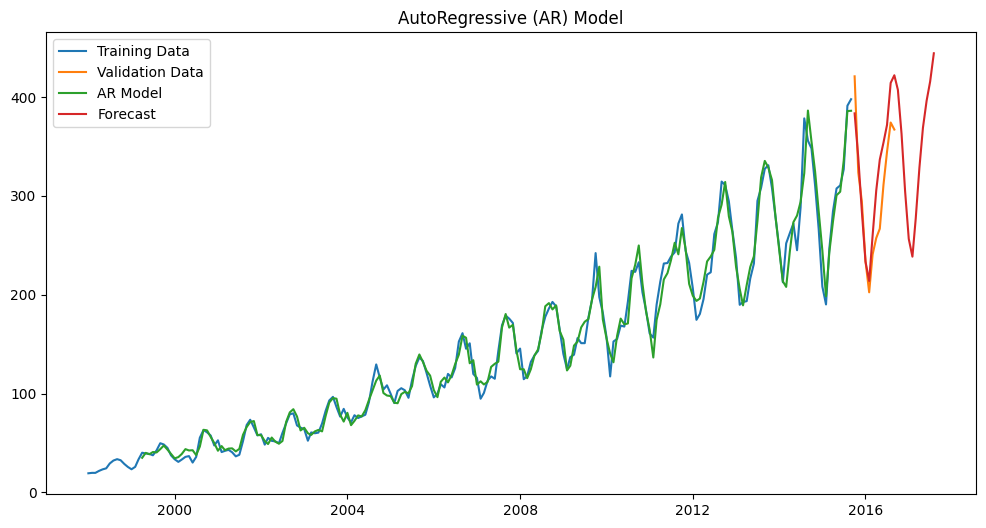

In [ ]:
lags = 15
ar_model = AutoReg(train_data, lags=lags).fit()
ar_forecast = ar_model.predict(start=len(train_data), end=len(train_data) + 22, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(ar_model.fittedvalues, label='AR Model')
plt.plot(ar_forecast, label='Forecast')
plt.legend()
plt.title('AutoRegressive (AR) Model')
plt.show()

### ARMA

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


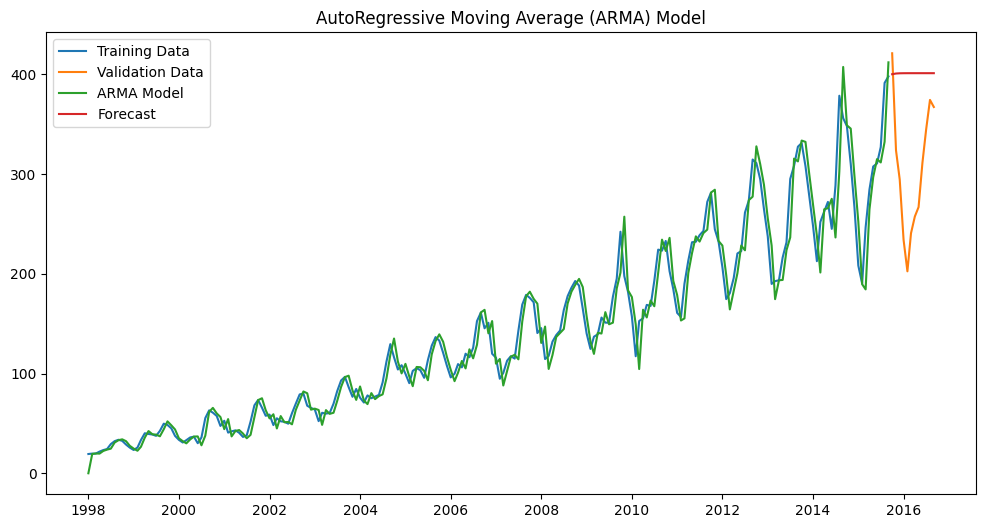

Mean Squared Error (ARMA Model): 13546.906013319802


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

order = (2, 1, 0)
arma_model = statsmodels.tsa.arima.model.ARIMA(train_data, order=order).fit()
arma_forecast = arma_model.predict(start=len(train_data), end=len(train_data) + 11, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(arma_model.fittedvalues, label='ARMA Model')
plt.plot(arma_forecast, label='Forecast')
plt.legend()
plt.title('AutoRegressive Moving Average (ARMA) Model')
plt.show()

mse_arma = mean_squared_error(validation_data, arma_forecast)
print('Mean Squared Error (ARMA Model):', mse_arma)

### ARIMA

/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/opt/homebrew/lib/python3.11/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


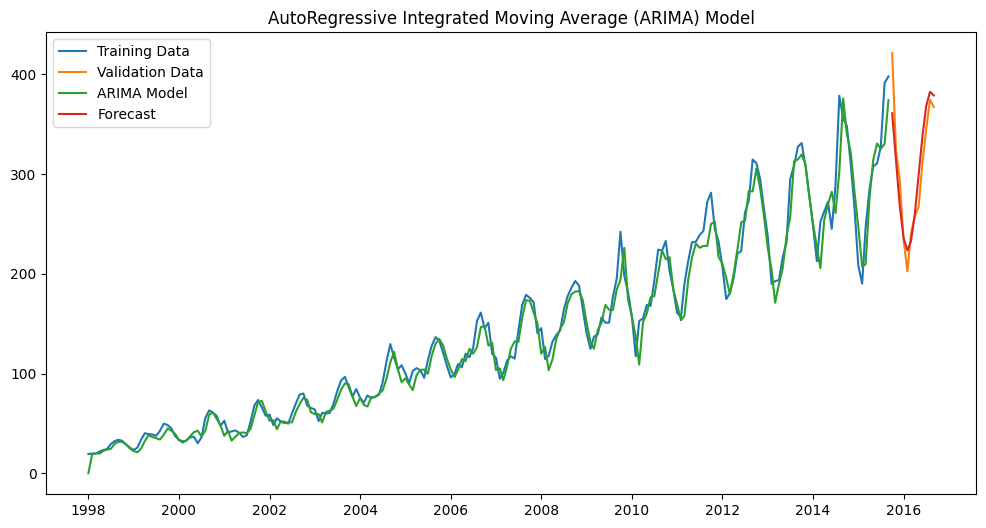

Mean Squared Error (ARIMA Model): 613.0253490935122


In [ ]:
order = (2, 1, 2)
arima_model = ARIMA(train_data, order=order).fit()
arima_forecast = arima_model.predict(start=len(train_data), end=len(train_data) + 11, dynamic=False)

plt.figure(figsize=(12, 6))
plt.plot(train_data, label='Training Data')
plt.plot(validation_data, label='Validation Data')
plt.plot(arima_model.fittedvalues, label='ARIMA Model')
plt.plot(arima_forecast, label='Forecast')
plt.legend()
plt.title('AutoRegressive Integrated Moving Average (ARIMA) Model')
plt.show()

mse_arima = mean_squared_error(validation_data, arima_forecast)
print('Mean Squared Error (ARIMA Model):', mse_arima)